In [4]:
# reference: https://realpython.com/python-opencv-color-spaces/

# imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import time

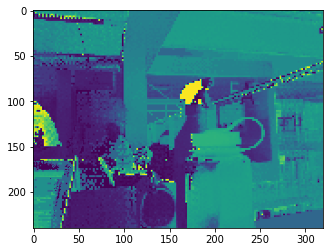

In [5]:
my_picture = cv2.imread('example_image.png')
#my_picture = cv2.cvtColor(my_picture, cv2.COLOR_BGR2RGB)
my_picture_hsv = cv2.cvtColor(my_picture, cv2.COLOR_BGR2HSV)
plt.imshow(my_picture_hsv[:,:,0])
#print(my_picture_hsv[0,:])

this took 0.0032987594604492188 seconds
I saw blue
I saw red


Text(0.5, 1.0, 'green')

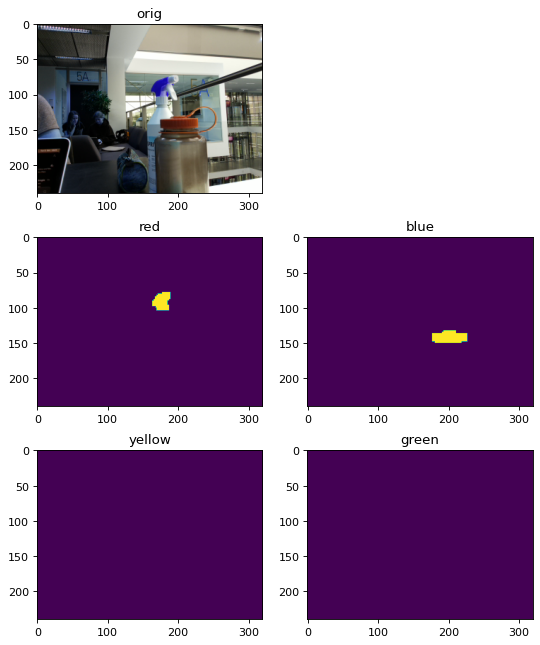

In [6]:
my_picture = cv2.imread('example_image.png')
#my_picture = cv2.cvtColor(my_picture, cv2.COLOR_BGR2RGB)
start = time.time()
my_picture_hsv = cv2.cvtColor(my_picture, cv2.COLOR_BGR2HSV)

input_hsv = my_picture_hsv
kernel = np.ones((8,8), np.uint8)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(input_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(input_hsv, lower_red, upper_red)

# join my masks
red_mask = mask0+mask1
red_mask = cv2.threshold(red_mask, 1, 255, cv2.THRESH_BINARY)[1]
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_OPEN, kernel)

# blue 
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
blue_mask = cv2.inRange(input_hsv, lower_blue, upper_blue)
blue_mask = cv2.threshold(blue_mask, 1, 255, cv2.THRESH_BINARY)[1]
blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)

# green
lower_green = np.array([50,50,50])
upper_green = np.array([70,255,255])
green_mask = cv2.inRange(input_hsv, lower_green, upper_green)
green_mask = cv2.threshold(green_mask, 1, 255, cv2.THRESH_BINARY)[1]
green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)

# yellow
lower_yellow = np.array([25,50,50])
upper_yellow = np.array([35,255,255])
yellow_mask = cv2.inRange(input_hsv, lower_yellow, upper_yellow)
yellow_mask = cv2.threshold(yellow_mask, 1, 255, cv2.THRESH_BINARY)[1]
yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_OPEN, kernel)

print(f'this took {time.time() - start} seconds') # 0.00842... so we could run it almost every frame

masks = {'yellow': yellow_mask, 'green': green_mask, 'blue': blue_mask, 'red':red_mask}
for key, mask in masks.items():
    if np.sum(mask[:]) > 20:
        print(f'I saw {key}')

plt.figure(figsize=(8, 10), dpi=80)
plt.subplot(3, 2, 1)
plt.imshow(my_picture)
plt.title('orig')

plt.subplot(3, 2, 3)
plt.imshow(red_mask)
plt.title('red')

plt.subplot(3, 2, 4)
plt.imshow(blue_mask)
plt.title('blue')

plt.subplot(3, 2, 5)
plt.imshow(yellow_mask)
plt.title('yellow')

plt.subplot(3, 2, 6)
plt.imshow(green_mask)
plt.title('green')

In [23]:
# getting the centroid of the blobs
start = time.time()
M = cv2.moments(yellow_mask)

# calculate x,y coordinate of center
if not round(M["m10"]):
    print('test')
    pass
cX = int(M["m10"] / (M["m00"]+ 0.001)) #/ blue_mask.shape[0]
cY = int(M["m01"] / (M["m00"]))
#print(time.time()-start)
#print(cX)
#print(cY)

test


ZeroDivisionError: float division by zero